# Kaggle Competition : Cover Type Prediction of Forests

In [2]:
#Imports
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import ipywidgets as widgets
#https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html

# The Challenge

In this competition you are asked to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

Natural resource managers responsible for developing 
ecosystem management strategies require basic descriptive 
information including inventory data for forested lands to 
support their decision-making processes. However, managers 
generally do not have this type of data for inholdings or 
neighboring lands that are outside their immediate 
jurisdiction. One method of obtaining this information is 
through the use of predictive models. 

The study area included four wilderness areas found in 
the Roosevelt National Forest of northern Colorado. A total 
of twelve cartographic measures were utilized as independent 
variables in the predictive models, while seven major forest 
cover types were used as dependent variables. Several subsets 
of these variables were examined to determine the best overall 
predictive model.

File descriptions : 
- train-set.csv : the training set
- test-set.csv :the test set
- submission-ecample.csv : a sample submission file in the correct format

Data descriptions

Predicting forest cover type from cartographic variables only
(no remotely sensed data). The actual forest cover type for
a given observation (30 x 30 meter cell) was determined from
US Forest Service (USFS) Region 2 Resource Information System 
(RIS) data. Independent variables were derived from data
originally obtained from US Geological Survey (USGS) and
USFS data. Data is in raw form (not scaled) and contains
binary (0 or 1) columns of data for qualitative independent
variables (wilderness areas and soil types).

This study area includes four wilderness areas located in the
Roosevelt National Forest of northern Colorado. These areas
represent forests with minimal human-caused disturbances,
so that existing forest cover types are more a result of 
ecological processes rather than forest management practices.

Some background information for these four wilderness areas: 
Neota (area 2) probably has the highest mean elevational value of 
the 4 wilderness areas. Rawah (area 1) and Comanche Peak (area 3) 
would have a lower mean elevational value, while Cache la Poudre 
(area 4) would have the lowest mean elevational value.

As for primary major tree species in these areas, Neota would have 
spruce/fir (type 1), while Rawah and Comanche Peak would probably
have lodgepole pine (type 2) as their primary species, followed by 
spruce/fir and aspen (type 5). Cache la Poudre would tend to have 
Ponderosa pine (type 3), Douglas-fir (type 6), and 
cottonwood/willow (type 4).

The Rawah and Comanche Peak areas would tend to be more typical of 
the overall dataset than either the Neota or Cache la Poudre, due 
to their assortment of tree species and range of predictive 
variable values (elevation, etc.) Cache la Poudre would probably 
be more unique than the others, due to its relatively low 
elevation range and species composition.


Number of Attributes: 12 measures, but 54 columns of data
(10 quantitative variables, 4 binary
wilderness areas and 40 binary
soil type variables)


Attribute information:

Given is the attribute name, attribute type, the measurement unit and
a brief description. The forest cover type is the classification 
problem. The order of this listing corresponds to the order of 
numerals along the rows of the database.

Name Data Type Measurement Description

- Elevation quantitative meters Elevation in meters
- Aspect quantitative azimuth Aspect in degrees azimuth
- Slope quantitative degrees Slope in degrees
- Horizontal_Distance_To_Hydrology quantitative meters Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology quantitative meters Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways quantitative meters Horz Dist to nearest roadway
- Hillshade_9am quantitative 0 to 255 index Hillshade index at 9am, summer solstice
- Hillshade_Noon quantitative 0 to 255 index Hillshade index at noon, summer soltice
- Hillshade_3pm quantitative 0 to 255 index Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points quantitative meters Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns) qualitative 0 (absence) or 1 (presence) Wilderness area designation
- Soil_Type (40 binary columns) qualitative 0 (absence) or 1 (presence) Soil Type designation
- Cover_Type (7 types) integer 1 to 7 Forest Cover Type designation

Code Designations:

Wilderness Areas:

- 1 -- Rawah Wilderness Area
- 2 -- Neota Wilderness Area
- 3 -- Comanche Peak Wilderness Area
- 4 -- Cache la Poudre Wilderness Area

Soil Types: 1 to 40 : based on the USFS Ecological
Landtype Units (ELUs) for this study area:

Study Code USFS ELU Code Description
- 1 2702 Cathedral family - Rock outcrop complex, extremely stony.
- 2 2703 Vanet - Ratake families complex, very stony.
- 3 2704 Haploborolis - Rock outcrop complex, rubbly.
- 4 2705 Ratake family - Rock outcrop complex, rubbly.
- 5 2706 Vanet family - Rock outcrop complex complex, rubbly.
- 6 2717 Vanet - Wetmore families - Rock outcrop complex, stony.
- 7 3501 Gothic family.
- 8 3502 Supervisor - Limber families complex.
- 9 4201 Troutville family, very stony.
- 10 4703 Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11 4704 Bullwark - Catamount families - Rock land complex, rubbly.
- 12 4744 Legault family - Rock land complex, stony.
- 13 4758 Catamount family - Rock land - Bullwark family complex, rubbly.
- 14 5101 Pachic Argiborolis - Aquolis complex.
- 15 5151 unspecified in the USFS Soil and ELU Survey.
- 16 6101 Cryaquolis - Cryoborolis complex.
- 17 6102 Gateview family - Cryaquolis complex.
- 18 6731 Rogert family, very stony.
- 19 7101 Typic Cryaquolis - Borohemists complex.
- 20 7102 Typic Cryaquepts - Typic Cryaquolls complex.
- 21 7103 Typic Cryaquolls - Leighcan family, till substratum complex.
- 22 7201 Leighcan family, till substratum, extremely bouldery.
- 23 7202 Leighcan family, till substratum - Typic Cryaquolls complex.
- 24 7700 Leighcan family, extremely stony.
- 25 7701 Leighcan family, warm, extremely stony.
- 26 7702 Granile - Catamount families complex, very stony.
- 27 7709 Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28 7710 Leighcan family - Rock outcrop complex, extremely stony.
- 29 7745 Como - Legault families complex, extremely stony.
- 30 7746 Como family - Rock land - Legault family complex, extremely stony.
- 31 7755 Leighcan - Catamount families complex, extremely stony.
- 32 7756 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33 7757 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34 7790 Cryorthents - Rock land complex, extremely stony.
- 35 8703 Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36 8707 Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37 8708 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38 8771 Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39 8772 Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40 8776 Moran family - Cryorthents - Rock land complex, extremely stony.

Note: First digit: climatic zone Second digit: geologic zones
1. lower montane dry 1. alluvium
2. lower montane 2. glacial
3. montane dry 3. shale
4. montane 4. sandstone
5. montane dry and montane 5. mixed sedimentary
6. montane and subalpine 6. unspecified in the USFS ELU Survey
7. subalpine 7. igneous and metamorphic
8. alpine 8. volcanic

The third and fourth ELU digits are unique to the mapping unit 
and have no special meaning to the climatic or geologic zones.

Forest Cover Type Classes: 
- 1 -- Spruce/Fir
- 2 -- Lodgepole Pine
- 3 -- Ponderosa Pine
- 4 -- Cottonwood/Willow
- 5 -- Aspen
- 6 -- Douglas-fir
- 7 -- Krummholz

For further information: https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.info

# Load and Explore

In [3]:
train_data = pd.read_csv("train-set.csv", header='infer')
train_data = train_data.set_index('Id') #The Id column will be our index
test_data = pd.read_csv("test-set.csv", header='infer')
test_data = test_data.set_index('Id')
train_data.head(50)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2611,326,20,120,27,1597,168,214,184,2913,...,0,0,0,0,0,0,0,0,0,6
2,2772,324,17,42,7,1814,175,220,183,2879,...,0,0,0,0,0,0,0,0,0,2
3,2764,4,14,480,-21,700,201,212,148,700,...,0,0,0,0,0,0,0,0,0,2
4,3032,342,9,60,8,4050,202,227,164,2376,...,0,0,0,0,0,0,0,0,0,2
5,2488,23,11,117,21,1117,209,218,151,1136,...,0,0,0,0,0,0,0,0,0,2
6,2968,83,8,390,19,4253,232,226,127,4570,...,0,0,0,0,0,0,0,0,0,2
7,3027,11,6,534,47,1248,214,228,151,2388,...,0,0,0,0,0,0,0,0,0,2
8,3216,277,9,67,23,5430,212,236,169,2373,...,0,0,0,0,0,0,0,0,0,1
9,3242,262,5,849,169,1672,207,242,173,691,...,0,0,0,0,0,0,0,0,0,1


In [4]:
#Show the size of our data
print('Train data size : ' + str(train_data.shape))
print('Test data size : ' + str(test_data.shape))

Train data size : (528720, 55)
Test data size : (226595, 54)


### 1. Data Exploration and Pre-processing

In [5]:
train_data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,...,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000,528720.000000
mean,2959.800552,155.629891,14.095043,269.731845,46.474718,2352.595141,212.153062,223.343970,142.555615,1979.363977,...,0.090365,0.077678,0.002792,0.003276,0.000202,0.000471,0.026916,0.023646,0.015118,2.052294
std,280.351766,112.095470,7.501853,213.069124,58.433933,1563.557679,26.793767,19.813479,38.336178,1325.877589,...,0.286705,0.267665,0.052762,0.057141,0.014224,0.021696,0.161838,0.151943,0.122021,1.396863
min,1759.000000,-72.000000,-3.000000,-144.000000,-182.000000,-805.000000,-2.000000,0.000000,-17.000000,-704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,223.000000,30.000000,2001.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,387.000000,69.000000,3333.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3957.000000,440.000000,65.000000,1397.000000,601.000000,7577.000000,268.000000,266.000000,259.000000,7548.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
print("Null Values : ")
print(train_data.isnull().sum())

Null Values : 
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11              

In [7]:
print(train_data.dtypes)

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

We will split our 'train_data' into X, the features, and y, the output.

In [7]:
y = train_data['Cover_Type']
X = train_data.loc[:, train_data.columns != 'Cover_Type']
print('X shape : ' + str(X.shape))
print('y shape : ' + str(y.shape))

X shape : (528720, 54)
y shape : (528720,)


### 2. Data Correlation

We will take a look at the correlation matrix, through a heatmap showing us the regions in which we do expect the columns of X to be significant.

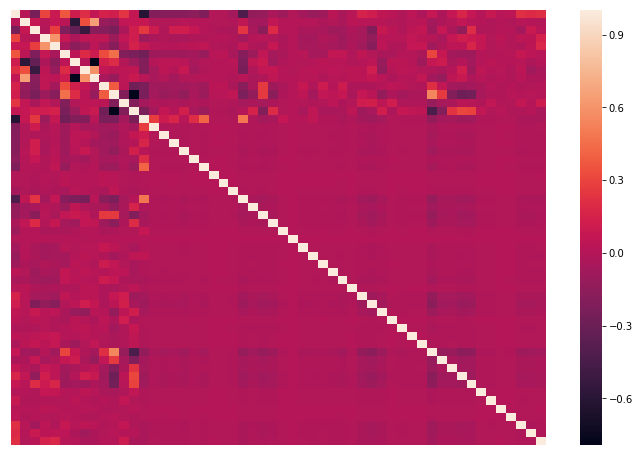

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(X.corr(), xticklabels=False, yticklabels=False)
#We notice that the most correlated datas are the ones in the first part of the dataset, so we do expect to drop the variables that are not in this region.

In [9]:
#Highly correlated values
corr_list = []
threshold = 0.3
size = 10

for i in range(0, size):
    for j in range(i+1, size):
        if (X.corr().iloc[i,j]>= threshold and X.corr().iloc[i,j]<1) or (X.corr().iloc[i,j] > -1 and X.corr().iloc[i,j]<=-threshold):
            corr_list.append([X.corr().iloc[i,j],i,j])

In [10]:
#Print the highest values
for v,i,j in sorted(corr_list,key= lambda x: -abs(x[0])):
    print("%s and %s = %.2f" % (train_data.columns[i], train_data.columns[j], v))

Hillshade_9am and Hillshade_3pm = -0.78
Aspect and Hillshade_3pm = 0.64
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.60
Hillshade_Noon and Hillshade_3pm = 0.59
Aspect and Hillshade_9am = -0.58
Slope and Hillshade_Noon = -0.52
Elevation and Horizontal_Distance_To_Roadways = 0.36
Aspect and Hillshade_Noon = 0.34
Horizontal_Distance_To_Roadways and Horizontal_Distance_To_Fire_Points = 0.33
Slope and Hillshade_9am = -0.33
Elevation and Horizontal_Distance_To_Hydrology = 0.30


In [11]:
#Highly correlated values with the answer
corr_y_list = {}
import operator

for col in train_data.columns :
    corr_y_list[col] = (train_data[col].corr(train_data['Cover_Type']))
#print(corr_y_list)
print(dict(sorted(corr_y_list.items(), key=operator.itemgetter(1), reverse=True)[:20]))

{'Cover_Type': 0.9999999999999999, 'Wilderness_Area4': 0.3209738360234331, 'Soil_Type10': 0.24173506193607672, 'Soil_Type38': 0.16138695708639836, 'Soil_Type39': 0.1599594281767736, 'Slope': 0.1474769438943181, 'Soil_Type40': 0.12992919580866455, 'Soil_Type2': 0.1186965268269743, 'Soil_Type6': 0.11232660401538251, 'Soil_Type4': 0.09814102817427023, 'Soil_Type17': 0.09213916640027733, 'Soil_Type1': 0.09020640209547827, 'Soil_Type35': 0.08112096961326393, 'Vertical_Distance_To_Hydrology': 0.08041822619188034, 'Soil_Type5': 0.07832552133994668, 'Soil_Type37': 0.07688460764855376, 'Soil_Type3': 0.06779466442211513, 'Soil_Type14': 0.06679445480800515, 'Wilderness_Area3': 0.06632417597153421, 'Soil_Type11': 0.0349738454445835}


### 3. Graphical Interpretation

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


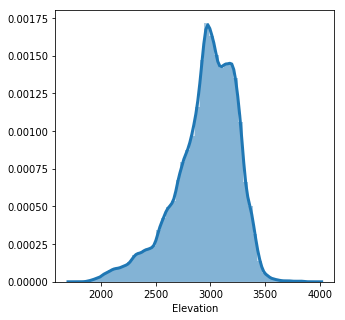

In [8]:
#Elevation
fig2, ax = plt.subplots(figsize=(5,5))
toplot = X['Elevation']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


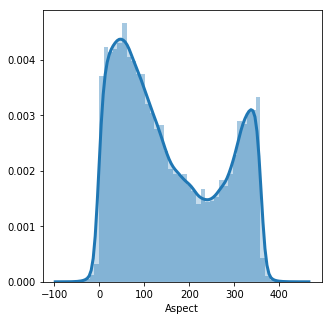

In [9]:
#Aspect
fig3, ax = plt.subplots(figsize=(5,5))
toplot = X['Aspect']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


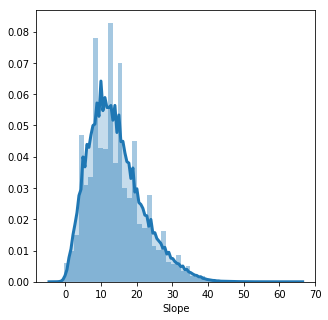

In [10]:
#Slope
fig4, ax = plt.subplots(figsize=(5,5))
toplot = X['Slope']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


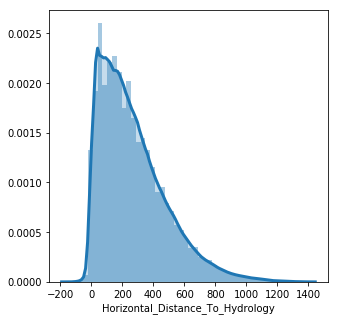

In [11]:
#Horizontal_Distance_To_Hydrology
fig5, ax = plt.subplots(figsize=(5,5))
toplot = X['Horizontal_Distance_To_Hydrology']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


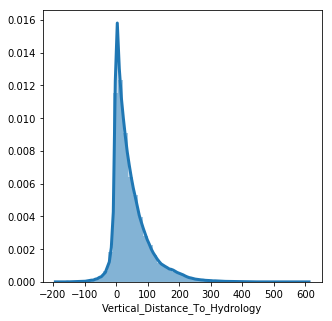

In [12]:
#Vertical_Distance_To_Hydrology
fig6, ax = plt.subplots(figsize=(5,5))
toplot = X['Vertical_Distance_To_Hydrology']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


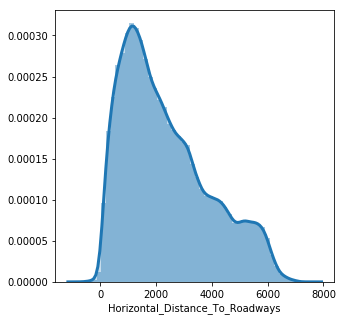

In [13]:
#Horizontal_Distance_To_Roadways
fig7, ax = plt.subplots(figsize=(5,5))
toplot = X['Horizontal_Distance_To_Roadways']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


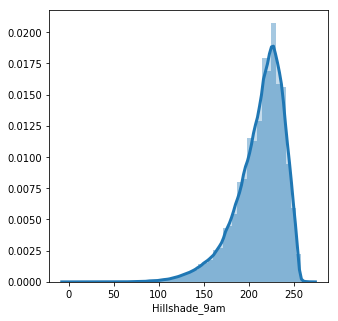

In [14]:
#Hillshade 9am
fig8, ax = plt.subplots(figsize=(5,5))
toplot = X['Hillshade_9am']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


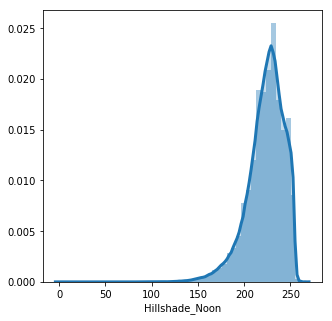

In [15]:
#Hillshade Noon
fig9, ax = plt.subplots(figsize=(5,5))
toplot = X['Hillshade_Noon']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


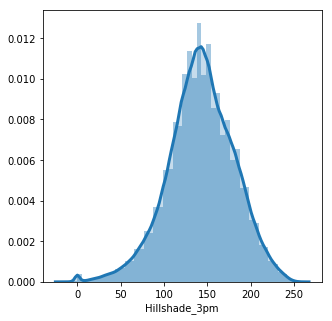

In [16]:
#Hillshade_3pm
fig10, ax = plt.subplots(figsize=(5,5))
toplot = X['Hillshade_3pm']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


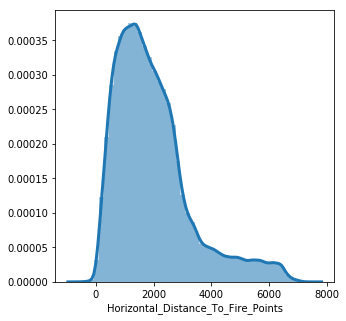

In [17]:
#Horizontal_Distance_To_Fire_Points 
fig11, ax = plt.subplots(figsize=(5,5))
toplot = X['Horizontal_Distance_To_Fire_Points']
sns.distplot(toplot, hist = True, kde = True, kde_kws = {'shade': True, 'linewidth': 3})

In [18]:
for i in range(10, train_data.shape[1]-1):
    j = train_data.columns[i]
    print (train_data[j].value_counts())

0    291433
1    237287
Name: Wilderness_Area1, dtype: int64
0    501464
1     27256
Name: Wilderness_Area2, dtype: int64
0    298063
1    230657
Name: Wilderness_Area3, dtype: int64
0    495200
1     33520
Name: Wilderness_Area4, dtype: int64
0    525982
1      2738
Name: Soil_Type1, dtype: int64
0    521855
1      6865
Name: Soil_Type2, dtype: int64
0    524330
1      4390
Name: Soil_Type3, dtype: int64
0    517484
1     11236
Name: Soil_Type4, dtype: int64
0    527248
1      1472
Name: Soil_Type5, dtype: int64
0    522725
1      5995
Name: Soil_Type6, dtype: int64
0    528618
1       102
Name: Soil_Type7, dtype: int64
0    528553
1       167
Name: Soil_Type8, dtype: int64
0    527633
1      1087
Name: Soil_Type9, dtype: int64
0    499150
1     29570
Name: Soil_Type10, dtype: int64
0    517413
1     11307
Name: Soil_Type11, dtype: int64
0    501470
1     27250
Name: Soil_Type12, dtype: int64
0    512833
1     15887
Name: Soil_Type13, dtype: int64
0    528170
1       550
Name: Soil_Ty

### 4. PCA Dimension reduction

In [13]:
rndperm = np.random.permutation(train_data.shape[0])

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(train_data.loc[:, train_data.columns != 'Cover_Type'].values)

train_data['pca-one'] = pca_result[:,0]
train_data['pca-two'] = pca_result[:,1] 
train_data['pca-three'] = pca_result[:,2]

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.66158414 0.30820109 0.01768539]


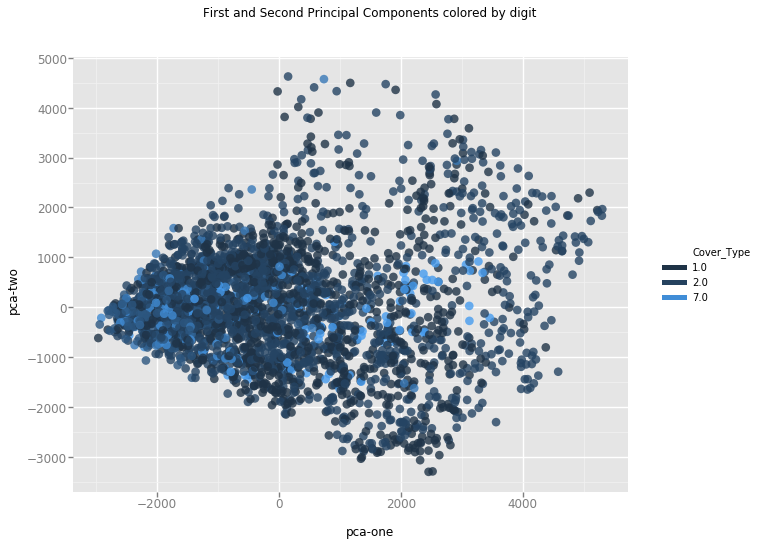

<ggplot: (7008259869)>

In [24]:
from pandas import Timestamp
from ggplot import *

chart = ggplot(train_data.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='Cover_Type') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

### 5. TSNE multidimensional representation

In [25]:
from sklearn.manifold import TSNE

In [26]:
n_sne = 7000

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(train_data.loc[rndperm[:n_sne],train_data.loc[:, train_data.columns != 'Cover_Type'].columns].values)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.015s...
[t-SNE] Computed neighbors for 7000 samples in 1.224s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 104.536271
[t-SNE] KL divergence after 250 iterations with early exaggeration: 73.066933
[t-SNE] Error after 300 iterations: 2.041419


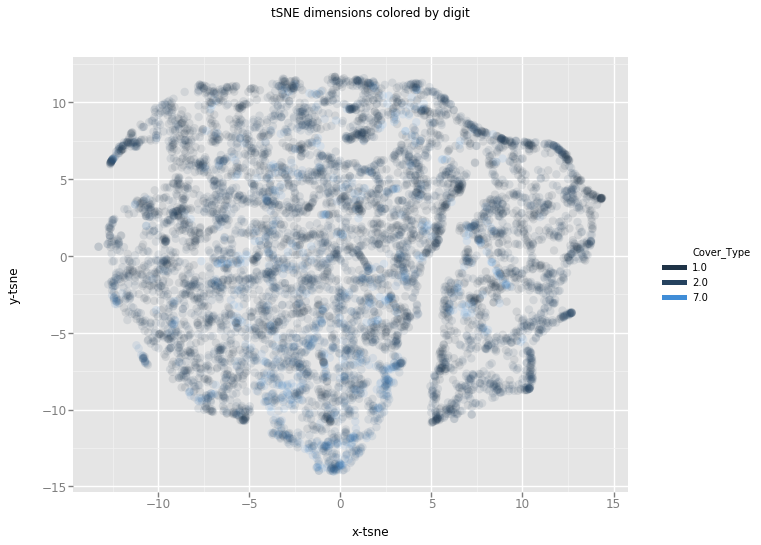

<ggplot: (7043069658)>

In [29]:
df_tsne = train_data.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot(df_tsne, aes(x='x-tsne', y='y-tsne', color='Cover_Type', fill = 'Cover_Type') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

# Train, Test, Predict

In [48]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score  
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix 

X.shape,y.shape

((523432, 54), (5288, 54), (523432,), (5288,))

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

kfold = KFold(n_splits=4, random_state=22)

## I. Supervised approach

### 1. Naïve Bayes Classifier

In machine learning, naive Bayes classifiers are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

Accuracy Model : 45.69% 


Text(0.5, 1.05, 'Confusion_matrix')

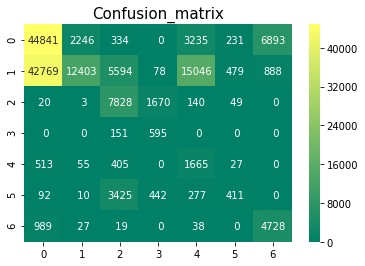

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
result_gnb = accuracy_score(y_test, y_pred_gnb)*100
print("Accuracy Model : %.2f%% " % result_gnb)

sns.heatmap(confusion_matrix(y_test,y_pred_gnb),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

## Search grid for optimal parameters

gnb_gs = GridSearchCV(gnb,param_grid = {}, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
gnb_gs.fit(X_train,y_train)

# Best score
param_gnb_gs = gnb_gs.best_estimator_
result_gnb_gs = gnb_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gnb_gs))

### 2. Logistic Regression

Logistic regression measures the relationship between the categorical dependent variable and one or more independent variables by estimating probabilities using a logistic function, which is the cumulative logistic distribution.

Accuracy Model : 70.58% 


Text(0.5, 1.05, 'Confusion_matrix')

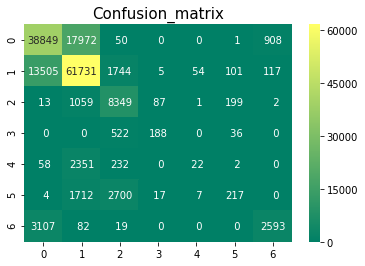

In [22]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
# Train the model using the training sets and check score
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
result_lr = accuracy_score(y_test, y_pred_lr)*100
print("Accuracy Model : %.2f%% " % result_lr)

sns.heatmap(confusion_matrix(y_test,y_pred_lr),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

## Search grid for optimal parameters
lr_param_grid = {"tol": [0.000001, 0.00001, 0.0001],
              "max_iter": [50, 120, 200]}

lr_gs = GridSearchCV(lr,param_grid = lr_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
lr_gs.fit(X_train,y_train)

# Best score
param_lr_gs = lr_gs.best_estimator_
result_lr_gs = lr_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_lr_gs))

### 3. Decision Tree Classifier

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves).

Accuracy Model : 89.83% 


Text(0.5, 1.05, 'Confusion_matrix')

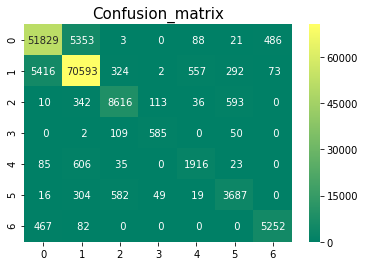

In [30]:
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

dt = tree.DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
result_dt = accuracy_score(y_test, y_pred_dt)*100
print("Accuracy Model : %.2f%% " % result_dt)

sns.heatmap(confusion_matrix(y_test,y_pred_dt),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

## Search grid for optimal parameters
dt_param_grid = {"presort": [True, False]}

dt_gs = GridSearchCV(dt,param_grid = dt_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
dt_gs.fit(X_train,y_train)

# Best score
param_dt_gs = dt_gs.best_estimator_
result_dt_gs = dt_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_dt_gs))

### 4. Random Forest

Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

Accuracy Model : 100.00% 


Text(0.5, 1.05, 'Confusion_matrix')

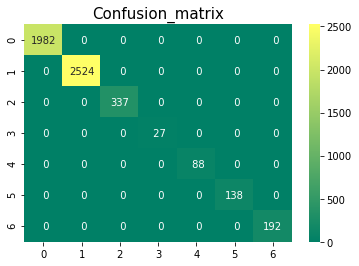

In [51]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth=100, n_estimators = 150, bootstrap = True)
rf.fit(X, y)

y_pred_rf = rf.predict(X_test)
result_rf = accuracy_score(y_test, y_pred_rf)*100
print("Accuracy Model : %.2f%% " % result_rf)

sns.heatmap(confusion_matrix(y_test,y_pred_rf),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [43]:
# Parameter tuning

## Search grid for optimal parameters
rf_param_grid = {#"max_depth": [100,200],
              #"max_features": [1, 3, 10],
              #"min_samples_split": [2, 3, 10],
              #"min_samples_leaf": [1, 3, 10],
              #"bootstrap": [True, False],
              #"n_estimators" :[100,200]
                }
#"criterion": ["gini"]

rf_gs = GridSearchCV(rf,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

rf_gs.fit(X_train,y_train)

# Best score
param_rf_gs = rf_gs.best_estimator_
result_rf_gs = rf_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_rf_gs))

Fitting 4 folds for each of 8 candidates, totalling 32 fits


KeyboardInterrupt: 

### 5. Extra Trees classifier

The main difference between random forests and extra trees (usually called extreme random forests) lies in the fact that, instead of computing the locally optimal feature/split combination (for the random forest), for each feature under consideration, a random value is selected for the split (for the extra trees).

This leads to more diversified trees and less splitters to evaluate when training an extremly random forest.

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Accuracy Model : 88.87% 


Text(0.5, 1.05, 'Confusion_matrix')

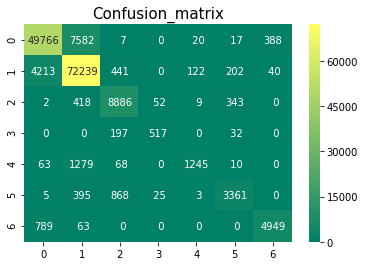

In [10]:
from sklearn import ensemble
from sklearn.ensemble import ExtraTreesClassifier

extc = ExtraTreesClassifier(n_estimators=1000,max_features= len(X_train.columns)-1,criterion= 'entropy',min_samples_split= 5,max_depth= 150, min_samples_leaf= 30)      
extc.fit(X_train,y_train) 

y_pred_extc = extc.predict(X_test)
result_extc = accuracy_score(y_test, y_pred_extc)*100

print("Accuracy Model : %.2f%% " % result_extc)
sns.heatmap(confusion_matrix(y_test,y_pred_extc),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

## Search grid for optimal parameters
extc_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


extc_gs = GridSearchCV(extc,param_grid = extc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

extc_gs.fit(X_train,y_train)

# Best score
param_extc_gs = extc_gs.best_estimator_
result_extc_gs = extc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_extc_gs))

### 6. K-Nearest Neighbors

In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression. In both cases, the input consists of the k closest training examples in the feature space.

Accuracy Model : 91.56% 


Text(0.5, 1.05, 'Confusion_matrix')

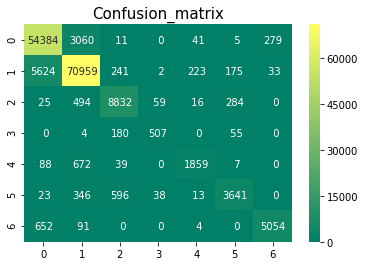

In [32]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X,y)

y_pred_knn = knn.predict(X_test)
result_knn = accuracy_score(y_test, y_pred_knn)*100
print("Accuracy Model : %.2f%% " % result_knn)

sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

## Search grid for optimal parameters
knn_param_grid = {"n_neighbors": [2,5,11,17,20,25],
              "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'],
              "weights": ['uniform', 'distance']}

knn_gs = GridSearchCV(knn,param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

knn_gs.fit(X_train,y_train)

# Best score
param_knn_gs = knn_gs.best_estimator_
result_knn_gs = knn_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_knn_gs))

### 7. Gradient Descent Classifier

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function (f) that minimizes a cost function (cost).

Gradient descent is best used when the parameters cannot be calculated analytically (e.g. using linear algebra) and must be searched for by an optimization algorithm.

Accuracy Model : 59.59% 


Text(0.5, 1.05, 'Confusion_matrix')

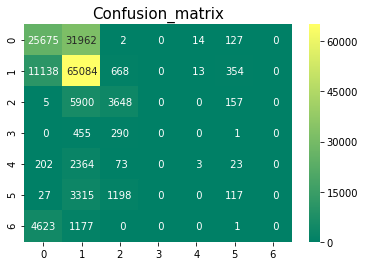

In [28]:
from sklearn.linear_model import SGDClassifier

gdc = SGDClassifier(penalty="l2", max_iter=5)
gdc.fit(X_train, y_train)  

y_pred_gdc = gdc.predict(X_test)
result_gdc = accuracy_score(y_test, y_pred_gdc)*100
print("Accuracy Model : %.2f%% " % result_gdc)

sns.heatmap(confusion_matrix(y_test,y_pred_gdc),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

gdc_param_grid = {'alpha' : [0.0001,0.0002, 0.0005, 0.0010, 0.0020, 0.05],
              'average' : [False, True],
              'epsilon': [0.05, 0.1, 0.15],
              'max_iter': [2,5,8, 10, 20]}

gdc_gs = GridSearchCV(gdc,param_grid = gdc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gdc_gs.fit(X_train,y_train)

# Best score
param_gdc_gs = gdc_gs.best_estimator_
result_gdc_gs = gdc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gdc_gs))

### 8. Gradient Boosting Classifier

Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.

Accuracy Model : 72.21% 


Text(0.5, 1.05, 'Confusion_matrix')

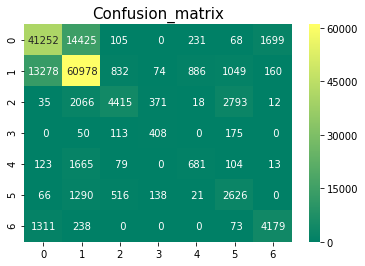

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=7, learning_rate=1.0, max_depth=5, random_state=0)
gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
result_gbc = accuracy_score(y_test, y_pred_gbc)*100
print("Accuracy Model : %.2f%% " % result_gbc)

sns.heatmap(confusion_matrix(y_test,y_pred_gbc),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

gbc_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300,400],
              'learning_rate': [0.1, 0.05, 0.01,0.001],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.2,0.1] 
              }

gbc_gs = GridSearchCV(gbc,param_grid = gbc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gbc_gs.fit(X_train,y_train)

# Best score
param_gbc_gs = gbc_gs.best_estimator_
result_gbc_gs = gbc_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_gbc_gs))

### 9. XGBoost

`XGBoost` is an algorithm that has recently been dominating applied machine learning for structured or tabular data. `XGBoost` is an implementation of gradient boosted decision trees designed for speed and performance.

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy Model : 73.97% 


Text(0.5, 1.05, 'Confusion_matrix')

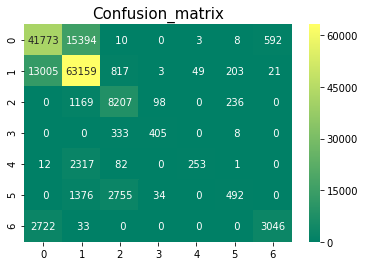

In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
result_xgb = accuracy_score(y_test, y_pred_xgb)*100
print("Accuracy Model : %.2f%% " % result_xgb)

sns.heatmap(confusion_matrix(y_test,y_pred_xgb),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tunning

xgb_param_grid = {'booster' : ['gbtree', 'gblinear', 'dart']
              }

xgb_gs = GridSearchCV(xgb,param_grid = xgb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

xgb_gs.fit(X_train,y_train)

# Best score
param_xgb_gs = xgb_gs.best_estimator_
result_xgb_gs = xgb_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_xgb_gs))

### 10. AdaBoost

The output of the other learning algorithms ('weak learners') is combined into a weighted sum that represents the final output of the boosted classifier. AdaBoost is adaptive in the sense that subsequent weak learners are tweaked in favor of those instances misclassified by previous classifiers.

Accuracy Model : 42.01% 


Text(0.5, 1.05, 'Confusion_matrix')

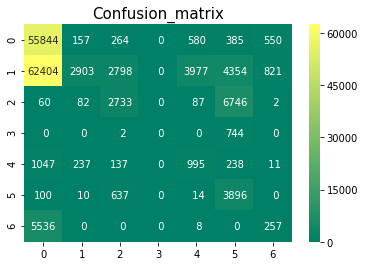

In [31]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=1000)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
result_ada = accuracy_score(y_test, y_pred_ada)*100
print("Accuracy Model : %.2f%% " % result_ada)

sns.heatmap(confusion_matrix(y_test,y_pred_ada),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning
ada_param_grid = {'n_estimators' : [20, 100, 500, 2000],
              'learning_rate': [0.5, 0.7, 1, 1.2, 1.5],
              'algorithm': ['SAMME', 'SAMME.R']
              }

ada_gs = GridSearchCV(ada,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

ada_gs.fit(X_train,y_train)

# Best score
param_ada_gs = ada_gs.best_estimator_
result_ada_gs = ada_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_ada_gs))

### 11. Support Vector Machine Classifier

Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting). 

In [ ]:
from sklearn import svm

svm = svm.SVC(probability = True) 
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
result_svm = accuracy_score(y_test, y_pred_svm)*100
print("Accuracy Model : %.2f%% " % result_svm)

sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

svm_param_grid = {'probability': [True],
    'kernel': ['rbf','linear']}

svm_gs = GridSearchCV(svm,param_grid = svm_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

svm_gs.fit(X_train,y_train)

# Best score
param_svm_gs = svm_gs.best_estimator_
result_svm_gs = svm_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_svm_gs))

### 12. Linear Discriminant Analysis

Linear discriminant analysis (LDA), normal discriminant analysis (NDA), or discriminant function analysis is a generalization of Fisher's linear discriminant, a method used in statistics, pattern recognition and machine learning to find a linear combination of features that characterizes or separates two or more classes of objects or events. The resulting combination may be used as a linear classifier, or, more commonly, for dimensionality reduction before later classification.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda= LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

y_pred_lda=lda.predict(X_test)
result_lda = accuracy_score(y_test, y_pred_lda)*100
print("Accuracy Model : %.2f%% " % result_lda)

sns.heatmap(confusion_matrix(y_test,y_pred_lda),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

lda_param_grid = {'tol':[0.001,0.01,.1,.2]}

lda_gs = GridSearchCV(lda,param_grid = lda_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
lda_gs.fit(X_train,y_train)

# Best score
param_lda_gs = lda_gs.best_estimator_
result_lda_gs = lda_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_lda_gs))

### 13. Quadratic Discriminant Analysis

Linear Discriminant Analysis can only learn linear boundaries, while Quadratic Discriminant Analysis can learn quadratic boundaries and is therefore more flexible. 

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda= QuadraticDiscriminantAnalysis()
qda.fit(X_train,y_train)

y_pred_qda=qda.predict(X_test)
result_qda = accuracy_score(y_test, y_pred_qda)*100
print("Accuracy Model : %.2f%% " % result_qda)

sns.heatmap(confusion_matrix(y_test,y_pred_qda),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

qda_param_grid = {'tol':[0.001,0.01,.1,.2]}

qda_gs = GridSearchCV(qda,param_grid = qda_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
qda_gs.fit(X_train,y_train)

# Best score
param_qda_gs = qda_gs.best_estimator_
result_qda_gs = qda_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_qda_gs))

### 14. Multi-Layer Perceptron

An MLP consists of, at least, three layers of nodes: an input layer, a hidden layer and an output layer. Except for the input nodes, each node is a neuron that uses a nonlinear activation function. MLP utilizes a supervised learning technique called backpropagation for training.

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp= MLPClassifier()
mlp.fit(X_train,y_train)

y_pred_mlp=mlp.predict(X_test)
result_mlp = accuracy_score(y_test, y_pred_mlp)*100
print("Accuracy Model : %.2f%% " % result_mlp)

sns.heatmap(confusion_matrix(y_test,y_pred_mlp),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

In [ ]:
# Parameter tuning

mlp_param_grid = {'activation' : ['identity', 'logistic', 'tanh', 'relu'],
                'solver' :['lbfgs', 'sgd', 'adam'],
                'learning_rate' :['constant', 'invscaling', 'adaptive'],
                'max_iter' : [400]
                 }

mlp_gs = GridSearchCV(mlp,param_grid = mlp_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)
mlp_gs.fit(X_train,y_train)

# Best score
param_mlp_gs = mlp_gs.best_estimator_
result_mlp_gs = mlp_gs.best_score_*100
print("Accuracy CV : %.2f%% " % (result_mlp_gs))

### 15. Multiclass Neural Network

In [55]:
import tensorflow
dbutils.tensorboard.start("/tmp/tensorflow_log_dir")

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [56]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [57]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=4, activation='relu'))
	model.add(Dense(3, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [58]:
keras = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

In [59]:
results = cross_val_score(keras, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

## II. Unsupervised approach

### 1. K-Means

In [64]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=8, random_state=0)
k_means.fit(X_train)

y_pred_kmeans = k_means.predict(X_test)
print("Accuracy : " + str(accuracy_score(y_test, y_pred_kmeans)))

### 2. Light-GBM

In [66]:
import lightgbm as lgb

param = {'num_leaves':31, 'num_trees':100, 'objective':'multiclass'}
param['metric'] = 'auc'

num_round = 10
bst = lgb.train(param, train_data, num_round, valid_sets=X_train)

# 7 entities, each contains 10 features
y_pred = bst.predict(X_test)
print("Accuracy : " + str(accuracy_score(y_test, y_pred_svm)))

### 3. Cat-Boost

In [68]:
from catboost import CatBoostRegressor
#categorical_features_indices = np.where(X.dtypes != np.float)[0]

from catboost import CatBoostRegressormodel=CatBoostRegressor(iterations=50, depth=3, learning_rate=0.1, loss_function='RMSE')

model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation),plot=True)

submission = pd.DataFrame()

submission['Item_Identifier'] = test['Item_Identifier']
submission['Outlet_Identifier'] = test['Outlet_Identifier']
submission['Item_Outlet_Sales'] = model.predict(test)

# Ensemble Model

### 1. Overall accuracy 

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Extra Trees','Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Descent', 'Gradient Boosting', 'Linear Discriminant Analysis', 
              'Decision Tree', 'XGBoost', 'Quadratic Discriminant', 'Multi-Layer Perceptron'],
    'Score': [result_svm, result_knn, result_lr, 
              result_rf, result_extc, result_gnb, result_ada, 
              result_gdc, result_gbc, result_lda, result_dt, result_xgb, result_qda, result_mlp],
    'CV Score': [result_svm_gs, result_knn_gs, result_lr_gs, 
              result_rf_gs, result_extc_gs, result_gnb_gs, result_ada_gs, 
              result_gdc_gs, result_gbc_gs, result_lda_gs, result_dt_gs, result_xgb_gs, result_qda_gs, result_mlp_gs]})
models = models.sort_values(by='CV Score',ascending=False)
models['Diff'] = round((- models['Score'] + models['CV Score']),4)
models

In [34]:
models = pd.DataFrame({
    'Model': ['KNN',  
              'Random Forest', 'Extra Trees','Decision Tree'],
    'Score': [result_knn,  
              result_rf, result_extc, result_dt]})
models = models.sort_values(by='Score',ascending=False)
models

,Model,Score
1,Random Forest,93.524613
0,KNN,91.564533
3,Decision Tree,89.825743
2,Extra Trees,88.870606


### 2. Learning curves

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt    

In [ ]:
g = plot_learning_curve(param_knn_gs,"KNN",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_lr_gs,"Logistic Regression",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_rf_gs,"Random Forest",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_ada_gs,"AdaBoostClassifier",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_gdc_gs,"Gradient Descent",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_gbc_gs,"Gradient Boosting",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_lda_gs,"Linear Discriminant",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_dt_gs,"Decision Tree",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_xgb_gs,"XGBoost",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_extc_gs,"Extra Trees",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_qda_gs,"Quadratic Discriminant",X_train,y_train,cv=kfold)

In [ ]:
g = plot_learning_curve(param_mlp_gs,"Multi Layer Perceptron",X_train,y_train,cv=kfold)

### 3. Voting Classifier

In [76]:
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('rf_gs', param_rf_gs), ('extc_gs', param_extc_gs),
 ('ada_gs',param_ada_gs),('svm_gs',param_svm_gs)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, y_train)

In [47]:
from sklearn.ensemble import VotingClassifier

votingC = VotingClassifier(estimators=[('extc', extc),('rf', rf),('knn',knn),('dt',dt)], voting='hard', n_jobs=4)
#('rf', rf), 
votingC = votingC.fit(X_train, y_train)

Process ForkPoolWorker-14:
Process ForkPoolWorker-16:
Process ForkPoolWorker-15:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
  File "/anaconda3/lib/python3.6/multiprocessing/pool.py", line 108, in worker
    task = get()
Traceback (most recent call last):


KeyboardInterrupt: 

# Export predictions

Once we have trained the classifier, we can use it to make predictions on the test data.

In [80]:
#predictions = model.transform(test_data)
#predictions = predictions.withColumn("Cover_Type", predictions["prediction"].cast("int"))  # Cast predictions to 'int' to mach the data type expected by Kaggle
# Show the content of 'predictions'
#predictions.printSchema()

In [52]:
#Unique classifier

test_class = pd.Series(rf.predict(test_data), name="RF")

IDtest = pd.DataFrame(test_data.index.values)
results = pd.concat([IDtest,test_class],axis=1)
results.columns = ['Id', 'Cover_Type']
results.to_csv("ensemble_python_voting_forest5.csv",index=False)

In [39]:
# Display predictions and probabilities
#display(predictions.select("Cover_Type", "probability"))

test_class = pd.Series(votingC.predict(test_data), name="Forest")

IDtest = test_data.index
results = pd.concat([IDtest,test_class],axis=1)

results.to_csv("ensemble_python_voting_xtra.csv",index=False)
#precitions = pd.DataFrame({'Id':df_Test.Id, 'Cover_Type':xgbc_pred}, columns = ['Id','Cover_Type'])

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


TypeError: cannot concatenate object of type "<class 'pandas.core.indexes.numeric.Int64Index'>"; only pd.Series, pd.DataFrame, and pd.Panel (deprecated) objs are valid